In [1]:
import tensorflow as tf
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

CATEGORIES = ['Electron','Muon','Tau','Quark']

c:\programdata\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
pickle_in = open("XLEP.pickle","rb")
X0 = pickle.load(pickle_in)

pickle_in = open("yLEP.pickle","rb")
z0 = pickle.load(pickle_in)

X = np.array(X0)

y = np.array(z0)

# K-fold cross-validation:

In [3]:


df_x = pd.DataFrame({'X_data': [X[i] for i in range(len(X))] })
df_y = pd.DataFrame({'y_data': y })

df_final = pd.concat([df_y,df_x], axis=1)
df_final.head()


,y_data,X_data
0,0,"[1.1436767578125, 0.9298052191734314, 0.929267..."
1,1,"[1.4359283447265625, 0.28194916248321533, 0.29..."
2,3,"[2.599151611328125, 0.5472841858863831, 0.5643..."
3,1,"[0.9006805419921875, -0.7204799652099609, -0.7..."
4,2,"[1.2020416259765625, -0.5682700872421265, -0.5..."


# training K-times with shufled data and savind the predictions of each time

In [4]:
#import tensorflow as tf
#from tensorflow.keras.models import Sequential  # for a sequential model 
#from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
#from tensorflow.keras.callbacks import TensorBoard
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
K=5

layer_size = 11


pred_cross = {}
score = []
#'fst-LEP-0.1-dr-128-l-1-de.model'
scaler = StandardScaler()

for i in range(K):
    mlp=0
    X_u = 0
    y_u=0
    X_test = 0
    y_test=0
    X_train=0
    y_train=0
    df_final = df_final.sample(frac=1).reset_index(drop=True)  #shuffle the rows only
    X_u = df_final['X_data']
    y_u = df_final['y_data']
    X_test = np.array([X_u[j] for j in range((len(X)//(K)))])
    X_train = np.array([X_u[j] for j in range((len(X)//(K)),len(X))])

    y_test = np.array([y_u[j] for j in range((len(y)//(K)))])
    y_train = np.array([y_u[j] for j in range((len(y)//(K)),len(y))])
    # Fit only to the training data
    scaler.fit(X_train)

    # Now apply the transformations to the data:
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    mlp = MLPClassifier(hidden_layer_sizes=(layer_size,layer_size,layer_size),max_iter=500)

    mlp.fit(X_train,y_train)

    pred_cross[str(i)+'pred'] = mlp.predict_proba(X_test)
#    score.append(mlp.evaluate(X_test,y_test))
    

In [24]:
for i in range(K):
    pred_cross[i] = pd.DataFrame(pred_cross[str(i)+'pred'])

pred_cross['4pred']

array([[3.61490917e-12, 9.99437701e-01, 5.62298904e-04, 3.92394937e-13],
       [1.22552097e-11, 9.97534945e-01, 2.46505470e-03, 4.58642842e-13],
       [2.40228041e-16, 9.99749483e-01, 2.50516630e-04, 9.01954558e-13],
       ...,
       [9.99922086e-01, 1.35271837e-05, 6.43869922e-05, 3.10397736e-15],
       [7.27298147e-24, 2.92337915e-26, 1.33874196e-08, 9.99999987e-01],
       [9.95140268e-01, 3.30791998e-06, 4.85642390e-03, 3.46815213e-13]])

In [8]:
y_pred = []
y_prob=[]
for i in range(K):
    y_pred.append([np.argmax(pred_cross[str(i)+'pred'][j]) for j in range(len(y_test))]) #  5 x 80000 array
    y_prob.append([np.max(pred_cross[str(i)+'pred'][j]) for j in range(len(y_test))])    # 5 x 80000  array

#y_pred_1 = [np.argmax(pred_cross['1pred'][j]) for j in range(len(y_test))]
#y_pred_2 = [np.argmax(pred_cross['2pred'][j]) for j in range(len(y_test))]
#y_pred_3 = [np.argmax(pred_cross['3pred'][j]) for j in range(len(y_test))]
#y_pred_4 = [np.argmax(pred_cross['4pred'][j]) for j in range(len(y_test))]



#y_prob_0 = [np.max(pred_cross['0pred'][j]) for j in range(len(y_test))]
#y_prob_1 = [np.max(pred_cross['1pred'][j]) for j in range(len(y_test))]
#y_prob_2 = [np.max(pred_cross['2pred'][j]) for j in range(len(y_test))]
#y_prob_3 = [np.max(pred_cross['3pred'][j]) for j in range(len(y_test))]
#y_prob_4 = [np.max(pred_cross['4pred'][j]) for j in range(len(y_test))]



In [9]:
y_pred[4][79999]

0

In [10]:
pd_y_test = pd.DataFrame({'y_test':y_test})
pd_y_prob = {}
pd_y_pred = {}
for i in range(K):
    pd_y_prob['y_prob'+str(i)] = y_prob[i]
    pd_y_pred['y_pred'+str(i)] = y_pred[i]
    
pd_y_prob = pd.DataFrame(pd_y_prob)
pd_y_pred = pd.DataFrame(pd_y_pred)

df_final = pd.concat([pd_y_test,pd_y_pred,pd_y_prob], axis=1)
df_final.head()

,y_test,y_pred0,y_pred1,y_pred2,y_pred3,y_pred4,y_prob0,y_prob1,y_prob2,y_prob3,y_prob4
0,1,2,0,2,1,1,0.999440,0.999849,0.999444,0.999930,0.999438
1,1,1,1,0,0,1,0.999055,0.999830,0.999990,0.999090,0.997535
2,1,0,0,3,2,1,0.999827,0.894022,0.999813,0.999552,0.999749
3,1,2,1,0,3,1,0.999998,0.999893,0.999129,1.000000,0.999748
4,0,1,3,3,3,0,0.997823,0.999848,0.999900,1.000000,0.932851


# Saving the DATA :

In [11]:
#saving df_final

import pickle

pickle_out = open("K-fold-sklearn-data-LEP.pickle","wb")
pickle.dump(df_final, pickle_out)
pickle_out.close()

In [12]:
#load

pickle_in = open("K-fold-sklearn-data-LEP.pickle","rb")
df_f= pickle.load(pickle_in)
df_f.head()

,y_test,y_pred0,y_pred1,y_pred2,y_pred3,y_pred4,y_prob0,y_prob1,y_prob2,y_prob3,y_prob4
0,1,2,0,2,1,1,0.999440,0.999849,0.999444,0.999930,0.999438
1,1,1,1,0,0,1,0.999055,0.999830,0.999990,0.999090,0.997535
2,1,0,0,3,2,1,0.999827,0.894022,0.999813,0.999552,0.999749
3,1,2,1,0,3,1,0.999998,0.999893,0.999129,1.000000,0.999748
4,0,1,3,3,3,0,0.997823,0.999848,0.999900,1.000000,0.932851


In [28]:
K =5
pd_y_test =pd.DataFrame( {'y_test':df_f['y_test']})
y_pred = [df_f['y_pred'+str(i)] for i in range(K)]
y_prob = [df_f['y_prob'+str(i)] for i in range(K)]

## lets do first for the pred0 prob0

In [29]:
df_final00 = pd.concat([pd_y_test,pd.DataFrame({'y_pred0':y_pred[0]}),pd.DataFrame({'y_prob0':y_prob[0]})], axis=1)
df_final00.head() #40000 test events


,y_test,y_pred0,y_prob0
0,1,2,0.999440
1,1,1,0.999055
2,1,0,0.999827
3,1,2,0.999998
4,0,1,0.997823


In [30]:
TP_final = []
FN_final = []
FP_final = []
TN_final = []

sh = 40
sh0 = 0.999

threshold = [sh0 + (1-sh0)* i/(sh) for i in range(sh)]
#print('threshold:',threshold)

for th in threshold:
    TP = []
    FN = []
    TN = []
    FP = []
    ct=0
    ct1=0
    ct2=0
    ct3=0
    ct4=0
    ct5=0
# true positive : A wolf appear and I see the wolf
    for i in range(len(CATEGORIES)):
        ct = df_final00[(df_final00.y_test ==i) & (df_final00.y_pred0 == i) & (df_final00.y_prob0 > th) ].count()
        TP.append(ct.y_test)
    TP_final.append(TP)
# false negative: A wolf appear but I not see the wolf
    for i in range(len(CATEGORIES)):
        ct1 =df_final00[(df_final00.y_test ==i) & (df_final00.y_pred0 != i) & (df_final00.y_prob0 >th) ].count()
        ct2= df_final00[(df_final00.y_test ==i) & (df_final00.y_pred0 == i) & (df_final00.y_prob0 <th) ].count()
        FN.append(ct1.y_test + ct2.y_test)
    FN_final.append(FN)
# false positive: doesn't have a wolf but I see it 
    for i in range(len(CATEGORIES)):
        ct3 =df_final00[(df_final00.y_test != i) & (df_final00.y_pred0 == i) & (df_final00.y_prob0 > th) ].count()
        FP.append(ct3.y_test)
    FP_final.append(FP)
# true negative: doesn't have a wolf and I do not see it    
    for i in range(len(CATEGORIES)):
        ct4=df_final00[(df_final00.y_test != i) & (df_final00.y_pred0 != i)  & (df_final00.y_prob0 > th)].count()
        ct5 =df_final00[(df_final00.y_test !=i) & (df_final00.y_pred0 == i) & (df_final00.y_prob0 <th) ].count()
        TN.append(ct4.y_test+ct5.y_test)
    TN_final.append(TN)
    

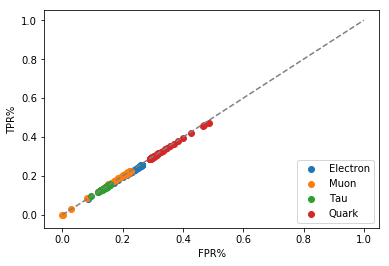

In [31]:
x_lin = np.linspace(0.0, 1.0, sh)
y0 =[[TP_final[i][j]/(TP_final[i][j]+FN_final[i][j]) for i in range(sh)]for j in range(len(CATEGORIES))]
x0 = [[FP_final[i][j]/(FP_final[i][j]+ TN_final[i][j]) for i in range(sh)]for j in range(len(CATEGORIES))]

fig, ax = plt.subplots()
ax.plot(x_lin, x_lin , '--',color = 'gray',)
for j in range(len(CATEGORIES)):
    plt.scatter(x0[j],y0[j],label= CATEGORIES[j])
    plt.legend(loc='lower right',fontsize=10)
plt.xlabel('FPR%')
plt.ylabel('TPR%')

In [32]:
## lets do for the pred1 prob1

df_final11 = pd.concat([pd_y_test,pd.DataFrame({'y_pred1':y_pred[1]}),pd.DataFrame({'y_prob1':y_prob[1]})], axis=1)
df_final11.head() #40000 test events


,y_test,y_pred1,y_prob1
0,1,0,0.999849
1,1,1,0.999830
2,1,0,0.894022
3,1,1,0.999893
4,0,3,0.999848


In [33]:
TP_final = []
FN_final = []
FP_final = []
TN_final = []

sh = 40
sh0 = 0.999

threshold = [sh0 + (1-sh0)* i/(sh) for i in range(sh)]
#print('threshold:',threshold)

for th in threshold:
    TP = []
    FN = []
    TN = []
    FP = []
    ct=0
    ct1=0
    ct2=0
    ct3=0
    ct4=0
    ct5=0
# true positive : A wolf appear and I see the wolf
    for i in range(len(CATEGORIES)):
        ct = df_final11[(df_final11.y_test ==i) & (df_final11.y_pred1 == i) & (df_final11.y_prob1 > th) ].count()
        TP.append(ct.y_test)
    TP_final.append(TP)
# false negative: A wolf appear but I not see the wolf
    for i in range(len(CATEGORIES)):
        ct1 =df_final11[(df_final11.y_test ==i) & (df_final11.y_pred1 != i) & (df_final11.y_prob1 >th) ].count()
        ct2= df_final11[(df_final11.y_test ==i) & (df_final11.y_pred1 == i) & (df_final11.y_prob1 <th) ].count()
        FN.append(ct1.y_test + ct2.y_test)
    FN_final.append(FN)
# false positive: doesn't have a wolf but I see it 
    for i in range(len(CATEGORIES)):
        ct3 =df_final11[(df_final11.y_test != i) & (df_final11.y_pred1 == i) & (df_final11.y_prob1 > th) ].count()
        FP.append(ct3.y_test)
    FP_final.append(FP)
# true negative: doesn't have a wolf and I do not see it    
    for i in range(len(CATEGORIES)):
        ct4=df_final11[(df_final11.y_test != i) & (df_final11.y_pred1 != i)  & (df_final11.y_prob1 > th)].count()
        ct5 =df_final11[(df_final11.y_test !=i) & (df_final11.y_pred1 == i) & (df_final11.y_prob1 <th) ].count()
        TN.append(ct4.y_test+ct5.y_test)
    TN_final.append(TN)
    

#x_lin = np.linspace(0., 1, sh)
y1 =[[TP_final[i][j]/(TP_final[i][j]+FN_final[i][j]) for i in range(sh)]for j in range(len(CATEGORIES))]
x1 = [[FP_final[i][j]/(FP_final[i][j]+TN_final[i][j]) for i in range(sh)]for j in range(len(CATEGORIES))]

#fig, ax = plt.subplots()
#ax.plot(x_lin, x_lin , '--',color = 'gray',)
#for j in range(len(CATEGORIES)):
#    plt.scatter(x1[j],y1[j],label= CATEGORIES[j])
#    plt.legend(loc='lower right',fontsize=10)
#plt.xlabel('FPR%')
#plt.ylabel('TPR%')

In [34]:
## lets do for the pred2 prob2

df_final22 = pd.concat([pd_y_test,pd.DataFrame({'y_pred2':y_pred[2]}),pd.DataFrame({'y_prob2':y_prob[2]})], axis=1)
df_final22.head() #40000 test events


,y_test,y_pred2,y_prob2
0,1,2,0.999444
1,1,0,0.999990
2,1,3,0.999813
3,1,0,0.999129
4,0,3,0.999900


In [35]:
TP_final = []
FN_final = []
FP_final = []
TN_final = []

sh = 40
sh0 = 0.999

threshold = [sh0 + (1-sh0)* i/(sh) for i in range(sh)]
#print('threshold:',threshold)

for th in threshold:
    TP = []
    FN = []
    TN = []
    FP = []
    ct=0
    ct1=0
    ct2=0
    ct3=0
    ct4=0
    ct5=0
# true positive : A wolf appear and I see the wolf
    for i in range(len(CATEGORIES)):
        ct = df_final22[(df_final22.y_test ==i) & (df_final22.y_pred2 == i) & (df_final22.y_prob2 > th) ].count()
        TP.append(ct.y_test)
    TP_final.append(TP)
# false negative: A wolf appear but I not see the wolf
    for i in range(len(CATEGORIES)):
        ct1 =df_final22[(df_final22.y_test ==i) & (df_final22.y_pred2 != i) & (df_final22.y_prob2 >th) ].count()
        ct2= df_final22[(df_final22.y_test ==i) & (df_final22.y_pred2 == i) & (df_final22.y_prob2 <th) ].count()
        FN.append(ct1.y_test + ct2.y_test)
    FN_final.append(FN)
# false positive: doesn't have a wolf but I see it 
    for i in range(len(CATEGORIES)):
        ct3 =df_final22[(df_final22.y_test != i) & (df_final22.y_pred2 == i) & (df_final22.y_prob2 > th) ].count()
        FP.append(ct3.y_test)
    FP_final.append(FP)
# true negative: doesn't have a wolf and I do not see it    
    for i in range(len(CATEGORIES)):
        ct4=df_final22[(df_final22.y_test != i) & (df_final22.y_pred2 != i)  & (df_final22.y_prob2 > th)].count()
        ct5 =df_final22[(df_final22.y_test !=i) & (df_final22.y_pred2 == i) & (df_final22.y_prob2 <th) ].count()
        TN.append(ct4.y_test+ct5.y_test)
    TN_final.append(TN)
    

#x_lin = np.linspace(0.0, 1.0, sh)
y2 =[[TP_final[i][j]/(TP_final[i][j]+FN_final[i][j]) for i in range(sh)]for j in range(len(CATEGORIES))]
x2 = [[FP_final[i][j]/(FP_final[i][j]+ TN_final[i][j]) for i in range(sh)]for j in range(len(CATEGORIES))]

#fig, ax = plt.subplots()
#ax.plot(x_lin, x_lin , '--',color = 'gray',)
#for j in range(len(CATEGORIES)):
#    plt.scatter(x2[j],y2[j],label= CATEGORIES[j])
#    plt.legend(loc='lower right',fontsize=10)
#plt.xlabel('FPR%')
#plt.ylabel('TPR%')

In [36]:
## lets do for the pred3 prob3

df_final33 = pd.concat([pd_y_test,pd.DataFrame({'y_pred3':y_pred[3]}),pd.DataFrame({'y_prob3':y_prob[3]})], axis=1)
df_final33.head() #80000 test events

,y_test,y_pred3,y_prob3
0,1,1,0.999930
1,1,0,0.999090
2,1,2,0.999552
3,1,3,1.000000
4,0,3,1.000000


In [37]:
TP_final = []
FN_final = []
FP_final = []
TN_final = []

sh = 40
sh0 = 0.999

threshold = [sh0 + (1-sh0)* i/(sh) for i in range(sh)]
#print('threshold:',threshold)

for th in threshold:
    TP = []
    FN = []
    TN = []
    FP = []
    ct=0
    ct1=0
    ct2=0
    ct3=0
    ct4=0
    ct5=0
# true positive : A wolf appear and I see the wolf
    for i in range(len(CATEGORIES)):
        ct = df_final33[(df_final33.y_test ==i) & (df_final33.y_pred3 == i) & (df_final33.y_prob3 > th) ].count()
        TP.append(ct.y_test)
    TP_final.append(TP)
# false negative: A wolf appear but I not see the wolf
    for i in range(len(CATEGORIES)):
        ct1 =df_final33[(df_final33.y_test ==i) & (df_final33.y_pred3 != i) & (df_final33.y_prob3 >th) ].count()
        ct2= df_final33[(df_final33.y_test ==i) & (df_final33.y_pred3 == i) & (df_final33.y_prob3 <th) ].count()
        FN.append(ct1.y_test + ct2.y_test)
    FN_final.append(FN)
# false positive: doesn't have a wolf but I see it 
    for i in range(len(CATEGORIES)):
        ct3 =df_final33[(df_final33.y_test != i) & (df_final33.y_pred3 == i) & (df_final33.y_prob3 > th) ].count()
        FP.append(ct3.y_test)
    FP_final.append(FP)
# true negative: doesn't have a wolf and I do not see it    
    for i in range(len(CATEGORIES)):
        ct4=df_final33[(df_final33.y_test != i) & (df_final33.y_pred3 != i)  & (df_final33.y_prob3 > th)].count()
        ct5 =df_final33[(df_final33.y_test !=i) & (df_final33.y_pred3 == i) & (df_final33.y_prob3 <th) ].count()
        TN.append(ct4.y_test+ct5.y_test)
    TN_final.append(TN)
    

#x_lin = np.linspace(0.0, 1.0, sh)
y3 =[[TP_final[i][j]/(TP_final[i][j]+FN_final[i][j]) for i in range(sh)]for j in range(len(CATEGORIES))]
x3 = [[FP_final[i][j]/(FP_final[i][j]+ TN_final[i][j]) for i in range(sh)]for j in range(len(CATEGORIES))]

#fig, ax = plt.subplots()
#ax.plot(x_lin, x_lin , '--',color = 'gray',)
#for j in range(len(CATEGORIES)):
#    plt.scatter(x3[j],y3[j],label= CATEGORIES[j])
#    plt.legend(loc='lower right',fontsize=10)
#plt.xlabel('FPR%')
#plt.ylabel('TPR%')

In [38]:
## lets do for the pred4 prob4

df_final44 = pd.concat([pd_y_test,pd.DataFrame({'y_pred4':y_pred[4]}),pd.DataFrame({'y_prob4':y_prob[4]})], axis=1)
df_final44.tail() #80000 test events

,y_test,y_pred4,y_prob4
79995,1,1,0.998762
79996,2,2,0.955564
79997,0,0,0.999922
79998,3,3,1.000000
79999,0,0,0.995140


In [76]:
TP_final = []
FN_final = []
FP_final = []
TN_final = []

sh = 40
sh0 = 0.999

threshold = [sh0 + (1-sh0)* i/(sh) for i in range(sh)]
#print('threshold:',threshold)

for th in threshold:
    TP = []
    FN = []
    TN = []
    FP = []
    ct=0
    ct1=0
    ct2=0
    ct3=0
    ct4=0
    ct5=0
# true positive : A wolf appear and I see the wolf
    for i in range(len(CATEGORIES)):
        ct = df_final44[(df_final44.y_test ==i) & (df_final44.y_pred4 == i) & (df_final44.y_prob4 > th) ].count()
        TP.append(ct.y_test)
    TP_final.append(TP)
# false negative: A wolf appear but I not see the wolf
    for i in range(len(CATEGORIES)):
        ct1 =df_final44[(df_final44.y_test ==i) & (df_final44.y_pred4 != i) & (df_final44.y_prob4 >th) ].count()
        ct2= df_final44[(df_final44.y_test ==i) & (df_final44.y_pred4 == i) & (df_final44.y_prob4 <th) ].count()
        FN.append(ct1.y_test + ct2.y_test)
    FN_final.append(FN)
# false positive: doesn't have a wolf but I see it 
    for i in range(len(CATEGORIES)):
        ct3 =df_final44[(df_final44.y_test != i) & (df_final44.y_pred4 == i) & (df_final44.y_prob4 > th) ].count()
        FP.append(ct3.y_test)
    FP_final.append(FP)
# true negative: doesn't have a wolf and I do not see it    
    for i in range(len(CATEGORIES)):
        ct4=df_final44[(df_final44.y_test != i) & (df_final44.y_pred4 != i)  & (df_final44.y_prob4 > th)].count()
        ct5 =df_final44[(df_final44.y_test !=i) & (df_final44.y_pred4 == i) & (df_final44.y_prob4 <th) ].count()
        TN.append(ct4.y_test+ct5.y_test)
    TN_final.append(TN)
    

#x_lin = np.linspace(0.0, 1.0, sh)
#y4 =[[TP_final[i][j]/(TP_final[i][j]+FN_final[i][j]) for i in range(sh)]for j in range(len(CATEGORIES))]
#x4 = [[FP_final[i][j]/(FP_final[i][j]+ TN_final[i][j]) for i in range(sh)]for j in range(len(CATEGORIES))]

#fig, ax = plt.subplots()
#ax.plot(x_lin, x_lin , '--',color = 'gray',)
#for j in range(len(CATEGORIES)):
#    plt.scatter(x4[j],y4[j],label= CATEGORIES[j])
#    plt.legend(loc='lower right',fontsize=10)
#plt.xlabel('FPR%')
#plt.ylabel('TPR%')

# Average

In [91]:
#y[3][39]
y = [y0,y1,y2,y3]
x = [x0,x1,x2,x3]#K=4 x CAT=4 X SH=40
TPR_ave = []
FPR_ave = []

for j in range(len(CATEGORIES)):
    ttt = []
    qqq =[]
    for k in range(sh):
        ttt.append(np.average([y[i][j][k] for i in range(3)]))
        qqq.append(np.average([x[i][j][k] for i in range(3)]))
    TPR_ave.append(ttt)
    FPR_ave.append(qqq)
print(len(TPR_ave),len(FPR_ave))



4 4


# Standard deviation

In [86]:
TPR_std = []
FPR_std = []

for j in range(len(CATEGORIES)):
    ttt = []
    qqq =[]
    for k in range(sh):
        ttt.append(np.std([y[i][j][k] for i in range(3)]))
        qqq.append(np.std([x[i][j][k] for i in range(3)]))
    TPR_std.append(ttt)
    FPR_std.append(qqq)
print(len(TPR_std),len(FPR_std))

4 4


c:\programdata\anaconda3\lib\site-packages\matplotlib\pyplot.py:2922: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


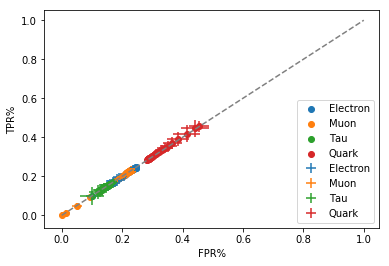

In [92]:
fig, ax = plt.subplots()
ax.plot(x_lin, x_lin , '--',color = 'gray',)
for j in range(len(CATEGORIES)):
    plt.scatter(TPR_ave[j],FPR_ave[j],label= CATEGORIES[j])
    plt.errorbar(TPR_ave[j],FPR_ave[j], yerr=TPR_std[j], xerr=FPR_std[j], hold=True, fmt='none', label=CATEGORIES[j])
    plt.legend(loc='lower right',fontsize=10)
plt.xlabel('FPR%')
plt.ylabel('TPR%')